In [9]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   --- ------------------------------------ 11.3/124.9 MB 64.0 MB/s eta 0:00:02
   ------ --------------------------------- 19.7/124.9 MB 51.7 MB/s eta 0:00:03
   -------- ------------------------------- 27.0/124.9 MB 46.2 MB/s eta 0:00:03
   ----------- ---------------------------- 36.7/124.9 MB 44.8 MB/s eta 0:00:02
   --------------- ------------------------ 47.2/124.9 MB 46.9 MB/s eta 0:00:02
   ------------------ --------------------- 57.4/124.9 MB 46.9 MB/s eta 0:00:02
   --------------------- ------------------ 67.6/124.9 MB 47.4 MB/s eta 0:00:02
   ------------------------ --------------- 77.9/124.9 MB 47.8 MB/s eta 0:00:01
   ---------------------------- ----------- 88.3/124.9 MB 48.2 MB/s eta 0:00:01
   ------------------------------- -------- 98.6/124.9 MB 48.4 MB/s eta 0:00:01
   ---------------------------------- ---- 109.1/124.9 MB 48.7 MB/s eta 0:00:01
   ------------------------------------- - 119.5/

In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [7]:
df=pd.read_csv(r"C:\Users\joeto\Downloads\ref_data.xls")
print(df.head())

     0    1    2    3    4    5    6    7    8    9  ...  1015  1016  1017  \
0  174  185  196  202  206  212  215  176  159  143  ...     5    12    37   
1   42   46   49   47   41   39   57   66   67   71  ...    32    33    51   
2   50   59   61   60   60   56   54   51   52   50  ...   126    75    73   
3  222  228  228  229  229  227  228  229  225  223  ...   176   232   253   
4  106   91  131  163  214  201  244  195  182  143  ...   106    99    93   

   1018  1019  1020  1021  1022  1023  label  
0    38    18     5     3     2     2    cat  
1    52    54    55    59    58    51    cat  
2    73    70   104   140   149   166    cat  
3   246   235   223   206   214   215    cat  
4   100    93    90    75    88    85    cat  

[5 rows x 1025 columns]


In [18]:
print(y.value_counts())


label
cat    12499
dog    12499
Name: count, dtype: int64


In [21]:
df["label"] = df["label"].apply(lambda x: 0 if x == 'cat' else 1)


In [22]:
X = df.drop(columns=["label"]) 
y = df["label"] 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:




model = xgb.XGBClassifier(
    max_depth=6,
    n_estimators=300,
    learning_rate=0.1,
    objective='binary:logistic',
    subsample=0.8,
    colsample_bytree=0.8
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)



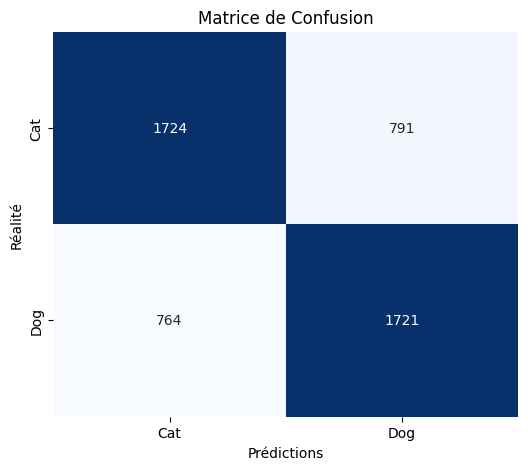

Accuracy : 0.69
F1-Score: 0.6888132879727836


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'], cbar=False)

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réalité')

# Afficher la matrice
plt.show()

# Calcul du score de précision (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1}")

In [50]:
from catboost import CatBoostClassifier



model = CatBoostClassifier(
    iterations=300,        # Nombre d'itérations
    depth=6,               # Profondeur des arbres
    learning_rate=0.1,     # Taux d'apprentissage
    cat_features=[]        # Liste des indices des colonnes catégorielles si présentes
)

# Entraînement du modèle
model.fit(X_train, y_train, cat_features=[],verbose=False)

y_pred = model.predict(X_test)


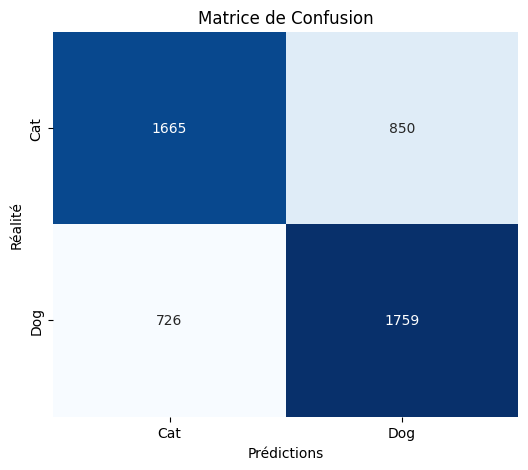

Accuracy : 0.68
F1-Score: 0.690616411464468


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'], cbar=False)

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réalité')

# Afficher la matrice
plt.show()

# Calcul du score de précision (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1}")

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)


C:\Users\joeto\anaconda3\envs\tp\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


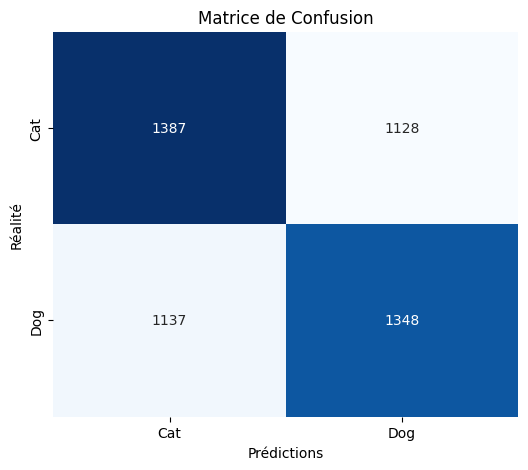

Accuracy : 0.55
F1-Score: 0.5434388228179803


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'], cbar=False)

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réalité')

# Afficher la matrice
plt.show()

# Calcul du score de précision (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1}")

In [60]:
from sklearn.ensemble import RandomForestClassifier


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Création du modèle de Random Forest
model = RandomForestClassifier(
    n_estimators=200,        # Nombre d'arbres dans la forêt
    max_depth=6,          # Profondeur des arbres
    random_state=42,         # Pour garantir la reproductibilité
    n_jobs=-1                # Utiliser tous les cœurs du processeur pour l'entraînement
)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)


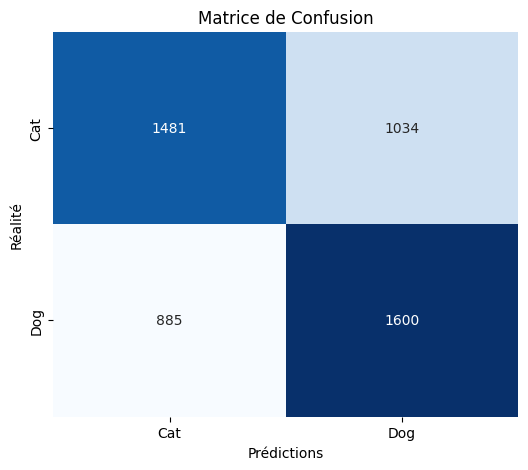

Accuracy : 0.62
F1-Score: 0.6251220941590154


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'], cbar=False)

plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réalité')

# Afficher la matrice
plt.show()

# Calcul du score de précision (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1}")
